In [4]:
# import the necessary packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec 


In [5]:
data=pd.read_csv("LoanApprovalPrediction.csv")

In [6]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
x=data.drop('Loan_Status',axis=1)
y=data['Loan_Status']

<AxesSubplot:>

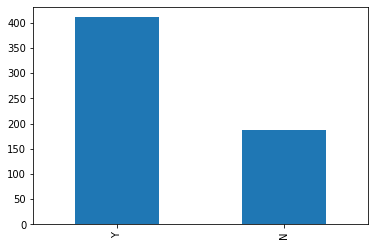

In [8]:
y.value_counts().plot(kind='bar')

In [9]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler()
x_os,y_os=os.fit_resample(x,y)

<AxesSubplot:>

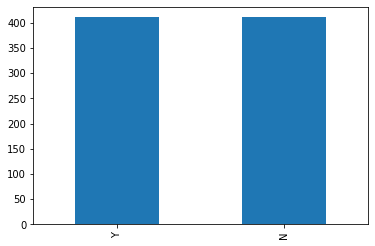

In [10]:
y_os.value_counts().plot(kind='bar')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [12]:
null_sum = data.isnull().sum()
null_sum

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
data = data.dropna()
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [14]:
null_sum1 = data.isnull().sum()
null_sum1

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
data = data.replace('Y', 1)
data = data.replace('N', 0)
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [16]:
data['Loan_Status'] = data['Loan_Status'].astype('int64')


In [17]:
data.corr()["Loan_Status"]

Dependents           0.035650
ApplicantIncome     -0.031608
CoapplicantIncome   -0.044173
LoanAmount          -0.058885
Loan_Amount_Term    -0.014107
Credit_History       0.529445
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

In [18]:
data=data.drop(columns=['Loan_ID','Gender','Married','Loan_Amount_Term','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'])

In [19]:
data

,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
1,1.0,Graduate,No,1.0,Rural,0
2,0.0,Graduate,Yes,1.0,Urban,1
3,0.0,Not Graduate,No,1.0,Urban,1
4,0.0,Graduate,No,1.0,Urban,1
5,2.0,Graduate,Yes,1.0,Urban,1
...,...,...,...,...,...,...
593,0.0,Graduate,No,1.0,Rural,1
594,3.0,Graduate,No,1.0,Rural,1
595,1.0,Graduate,No,1.0,Urban,1
596,2.0,Graduate,No,1.0,Urban,1


In [20]:
data=pd.get_dummies(data)

In [21]:
data

,Dependents,Credit_History,Loan_Status,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,1.0,0,1,0,1,0,1,0,0
2,0.0,1.0,1,1,0,0,1,0,0,1
3,0.0,1.0,1,0,1,1,0,0,0,1
4,0.0,1.0,1,1,0,1,0,0,0,1
5,2.0,1.0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
593,0.0,1.0,1,1,0,1,0,1,0,0
594,3.0,1.0,1,1,0,1,0,1,0,0
595,1.0,1.0,1,1,0,1,0,0,0,1
596,2.0,1.0,1,1,0,1,0,0,0,1


In [22]:
x=data.drop("Loan_Status",axis=1)
y=data["Loan_Status"]

In [23]:
x

,Dependents,Credit_History,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,1.0,1,0,1,0,1,0,0
2,0.0,1.0,1,0,0,1,0,0,1
3,0.0,1.0,0,1,1,0,0,0,1
4,0.0,1.0,1,0,1,0,0,0,1
5,2.0,1.0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
593,0.0,1.0,1,0,1,0,1,0,0
594,3.0,1.0,1,0,1,0,1,0,0
595,1.0,1.0,1,0,1,0,0,0,1
596,2.0,1.0,1,0,1,0,0,0,1


In [158]:
y

1      0
2      1
3      1
4      1
5      1
      ..
593    1
594    1
595    1
596    1
597    0
Name: Loan_Status, Length: 505, dtype: int64

In [159]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [160]:
def model_acc(model):
    model.fit(x_train,y_train)
    acc=model.score(x_test,y_test)
    print(str(model)+ '----->'+str(acc))

In [161]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model_acc(lr)

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
model_acc(dt)

from sklearn.svm import SVC
svc=SVC()
model_acc(svc)

from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
model_acc(nb)

from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
model_acc(RF)

from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
model_acc(KNN)

LogisticRegression()----->0.8267716535433071
DecisionTreeClassifier()----->0.8031496062992126
SVC()----->0.8267716535433071
GaussianNB()----->0.8031496062992126
RandomForestClassifier()----->0.8031496062992126
KNeighborsClassifier()----->0.7480314960629921
